Numerical Differentiation
========================

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences:
Therefore we find: 

$dx \approx \Delta x =x_1-x_0$

$dy \approx \Delta y =y_1-y_0= y(x_1)-y(x_0) = y(x_0+\Delta_x)-y(x_0)$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [1]:
dx = 1.
x = 1.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 10.
    

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000019   0.1000000000000019
 1e-02   2.0100000000000007   0.0100000000000007
 1e-03   2.0009999999996975   0.0009999999996975
 1e-04   2.0000999999991720   0.0000999999991720
 1e-05   2.0000100000139298   0.0000100000139298
 1e-06   2.0000009999243669   0.0000009999243669
 1e-07   2.0000001010878061   0.0000001010878061
 1e-08   1.9999999878450576  -0.0000000121549424
 1e-09   2.0000001654807416   0.0000001654807416
 1e-10   2.0000001654807416   0.0000001654807416


Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [2]:
((1.+0.0001)*(1+0.0001)-1)

0.0002000099999999172

Let's try using powers of 1/2

In [3]:
dx = 1.
x = 1.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%8.5e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 2.

1.00000e+00   3.0000000000000000   1.0000000000000000
5.00000e-01   2.5000000000000000   0.5000000000000000
2.50000e-01   2.2500000000000000   0.2500000000000000
1.25000e-01   2.1250000000000000   0.1250000000000000
6.25000e-02   2.0625000000000000   0.0625000000000000
3.12500e-02   2.0312500000000000   0.0312500000000000
1.56250e-02   2.0156250000000000   0.0156250000000000
7.81250e-03   2.0078125000000000   0.0078125000000000
3.90625e-03   2.0039062500000000   0.0039062500000000
1.95312e-03   2.0019531250000000   0.0019531250000000
9.76562e-04   2.0009765625000000   0.0009765625000000
4.88281e-04   2.0004882812500000   0.0004882812500000
2.44141e-04   2.0002441406250000   0.0002441406250000
1.22070e-04   2.0001220703125000   0.0001220703125000
6.10352e-05   2.0000610351562500   0.0000610351562500
3.05176e-05   2.0000305175781250   0.0000305175781250
1.52588e-05   2.0000152587890625   0.0000152587890625
7.62939e-06   2.0000076293945312   0.0000076293945312
3.81470e-06   2.000003814697

In addition, one could consider the midpoint difference, defined as:
$$ dy \approx \Delta y = y(x_0+\frac{\Delta_x}{2})-y(x_0-\frac{\Delta_x}{2}).$$

For a more complex function we need to import it from the math module. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and midpoint differences.

In [4]:
from math import sin, sqrt, pi
dx = 1.
while(dx > 1.e-10):
    x = pi/4.
    d1 = sin(x+dx) - sin(x); #forward
    d2 = sin(x+dx*0.5) - sin(x-dx*0.5); # midpoint
    d1 = d1 / dx;
    d2 = d2 / dx;
    print("%8.5e %20.16f %20.16f %20.16f %20.16f" % (dx, d1, d1-sqrt(2.)/2., d2, d2-sqrt(2.)/2.) )
    dx = dx / 2.

1.00000e+00   0.2699544827129282  -0.4371522984736194   0.6780100988420897  -0.0290966823444578
5.00000e-01   0.5048856975964859  -0.2022210835900616   0.6997640691250939  -0.0073427120614536
2.50000e-01   0.6118351194488110  -0.0952716617377366   0.7052667953545546  -0.0018399858319930
1.25000e-01   0.6611301360648314  -0.0459766451217162   0.7066465151141275  -0.0004602660724201
6.25000e-02   0.6845566203276636  -0.0225501608588839   0.7069916978116630  -0.0001150833748845
3.12500e-02   0.6959440534591259  -0.0111627277274217   0.7070780092891873  -0.0000287718973603
1.56250e-02   0.7015538499518499  -0.0055529312346977   0.7070995881463489  -0.0000071930401987
7.81250e-03   0.7043374663312676  -0.0027693148552800   0.7071049829223881  -0.0000017982641595
3.90625e-03   0.7057239167465070  -0.0013828644400405   0.7071063316202526  -0.0000004495662950
1.95312e-03   0.7064157978737740  -0.0006909833127736   0.7071066687949497  -0.0000001123915979
9.76562e-04   0.7067614018394579  -0.000

What do you notice? Which one does better?

A more in-depth discussion about round-off errors in numerical differentiation can be found <a href="http://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap11.pdf">here</a>

# Autodiff

Even better than numerical differentiation is automatic differentiation or *autodiff*, which is crucial to breakthroughs in machine learning.

This is a technique that allows to evaluate the derivative of a function to machine precision, without the need to use finite differences, using the fact that autodiff package knows the analytical form of the derivative for certain functions. It then builds a computational graph that allows for the evaluation of the derivative of a function using the chain rule.

In [5]:
!pip install jax jaxlib

In [6]:
import jax
import jax.numpy as jnp

In [7]:
def f(x):
    return x**2


In [8]:
grad_f = jax.grad(f)

In [9]:
x = 13.0
print(f"The gradient of f at x = {x} is {grad_f(x)}")

The gradient of f at x = 13.0 is 26.0


Compare to finite difference

In [10]:
dx = 1.
x = 13.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 10.

 1e+00  27.0000000000000000  25.0000000000000000
 1e-01  26.0999999999998522  24.0999999999998522
 1e-02  26.0099999999994225  24.0099999999994225
 1e-03  26.0009999999795127  24.0009999999795127
 1e-04  26.0000999998055704  24.0000999998055704
 1e-05  26.0000099984836162  24.0000099984836162
 1e-06  26.0000009859595558  24.0000009859595558
 1e-07  25.9999998775128844  23.9999998775128844
 1e-08  26.0000035723351139  24.0000035723351139
 1e-09  26.0000092566769965  24.0000092566769965
 1e-10  25.9998955698392749  23.9998955698392749


In [11]:
grad_f(13.0)

Array(26., dtype=float32, weak_type=True)

In [12]:
def f_complicated(x):
    return jnp.cos(jnp.sin(jnp.tanh(x)))

In [13]:
grad_fcomp = jax.grad(f_complicated)

In [14]:
grad_fcomp(3.1415)

Array(-0.00301054, dtype=float32, weak_type=True)

Some of the most complicated functions out there are called *neural networks* which can involve millions or billions of smaller functions or *neurons* in the composition. Autodiff also works on them, which is one of the crucial reasons there has been so much progress in AI in the last 10 years. 

Let's recall our simple neural network architecture that we studied prevously, a feedforward neural network of depth $3$. The equation defining the network is given by:

$$\mathbf{y} = \mathbf{W}_3\sigma(\mathbf{W}_2\sigma(\mathbf{W}_1\mathbf{x}+\mathbf{b}_1)+\mathbf{b}_2)+\mathbf{b}_3$$

where $\mathbf{x}$ is the input vector, $\mathbf{y}$ is the neural network prediction, $\mathbf{W}_i$ and $\mathbf{b}_i$ are the weight matrices and bias vectors of the network, and $\sigma$ is the non-linear activation function. Recall that the weights and biases are the parameters that are updated when the network is trained to do something useful.

So why is autodiff important here? This function looks complicated, but it's just a composition of affine transformations and elementwise non-linearities. We know the derivative of each of these functions, so we can use the chain rule to compute the derivative of the entire network, which is crucial for training. For functions that are compositions of many smaller functions, this is much more efficient than using finite differences and it has less error.

# Ordinary differential equations

Let’s consider a simple 1st order equation: 

$\frac{dy}{dx}=f(x,y)$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

## Euler’s method

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: 

$dx \approx \Delta x =x_1-x_0\\$
$dy \approx \Delta y =y_1-y_0$
 
with $y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:

$\frac{\Delta y}{\Delta x}=f(x,y)$ 

or 

$\Delta y = f(x,y)\Delta x$

and approximate the value of $y_1$ as
$y_1=y_0+f(x_0,y_0)(x_1-x_0)$.

We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as

$y_{2}=y_1+f(x_1,y_1)\Delta x,$ 

or in the general case:

$y_{n+1}=y_n+f(x_n,y_n)\Delta x$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. 

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $\frac{dT}{dt}=-r(T-T_s),$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [15]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [16]:
T = T0
my_temp, my_time = [], [] # store temps and times
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    my_time.append(i*dt)
    my_temp.append(T)
    if i%100 == 0: print ('{:20.18f}  {:20.18f}  {:20.18f}'.format(i,i*dt, T))
    # we can also do T = T - r*(T-Ts)*dt
    

100.000000000000000000  5.000000000000000000  38.778758136176847415
200.000000000000000000  10.000000000000000000  56.212079013989772136
300.000000000000000000  15.000000000000000000  66.772669411625400926
400.000000000000000000  20.000000000000000000  73.169962866400993562
500.000000000000000000  25.000000000000000000  77.045254114859673678
600.000000000000000000  30.000000000000000000  79.392790985967252482
700.000000000000000000  35.000000000000000000  80.814859421056084443
800.000000000000000000  40.000000000000000000  81.676306437699537355
900.000000000000000000  45.000000000000000000  82.198145572985325202
1000.000000000000000000  50.000000000000000000  82.514260293745351760
1100.000000000000000000  55.000000000000000000  82.705753246121219036
1200.000000000000000000  60.000000000000000000  82.821754015466851229


Let's try plotting the results. We first need to import the required libraries and methods

In [17]:
import numpy as np
from matplotlib import pyplot as plt

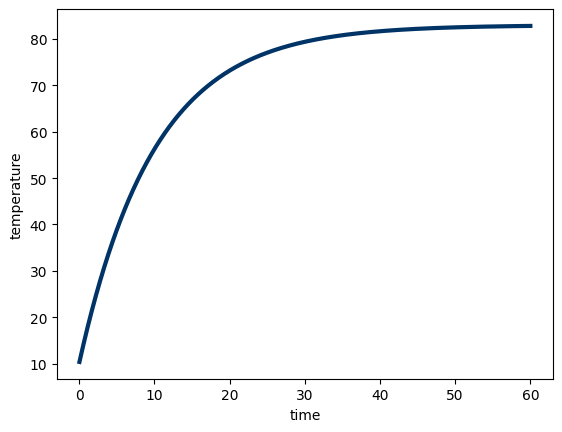

In [18]:
plt.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
plt.xlabel('time')
plt.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [19]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [20]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T


Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [21]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps $dt$ on the convergence. We expect that as $dt$ gets small, the result gets better and better but it's slower and slower

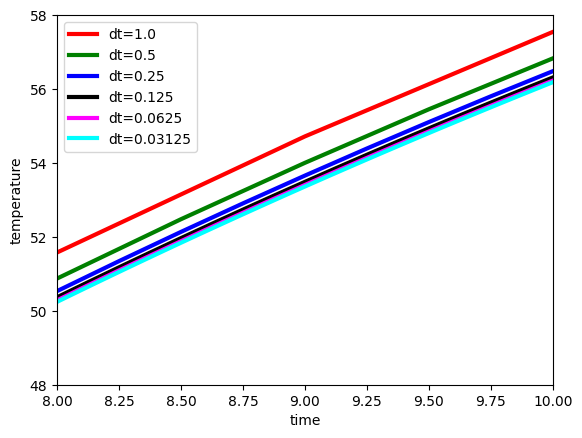

In [22]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(0,6):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    plt.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3, label="dt="+str(dt))
    dt = dt/2.

plt.xlabel('time');
plt.ylabel('temperature');
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58);

We see that the gap between the result gets smaller and smaller as $dt$ gets smaller and smaller. This problem is too simple to see the effect of $dt$ on computation time.

But on theoretical grounds, how does computation time scale?

### Challenge 1.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [23]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
dts, temp_at_t10s = [], []
for j in range(0,15):
    dts.append(dt)
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    t10_idx = np.where(my_time==10.)[0][0]
    temp_at_t10s.append(my_temp[t10_idx])

    dt = dt / 2

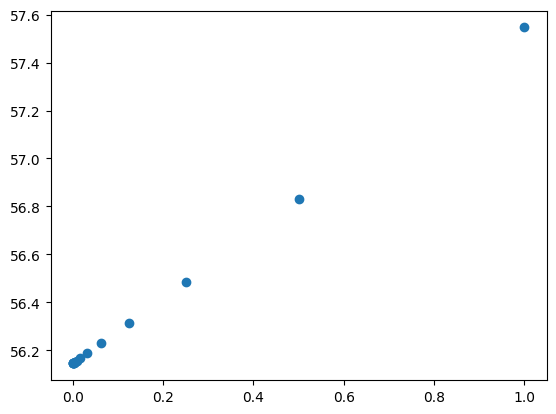

In [24]:
plt.scatter(dts, temp_at_t10s)

This shows explicit convergence to a fixed value. We'd also like to see the temperature differents

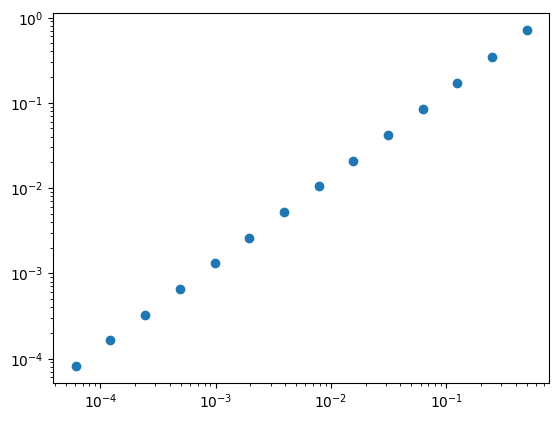

In [25]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(dts[1:], [abs(temp_at_t10s[i] - temp_at_t10s[i-1]) for i in range(1, len(dts))])

Such a beautiful line on a log-log scale tells us that the temperature difference for different dts scales as a power law. Let's find out what the exponent is by fitting a line to the data.


In [26]:
# fit line to data
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, np.log(dts[1:]), np.log([abs(temp_at_t10s[i] - temp_at_t10s[i-1]) for i in range(1, len(dts))]))

In [27]:
popt

array([1.004452  , 0.32696688])

The slope being $1$ tells us the power law.